# Car Performance: Fuel Efficiency

### Introduction to the Dataset: *Car Performance: Fuel Efficiency*

The *Car Performance: Fuel Efficiency* dataset provides detailed insights into the specifications and performance of 550 car models, emphasizing fuel efficiency and engine configurations. This dataset is an excellent resource for machine learning applications, data exploration, and automotive research.

#### Key Features:
- **`city_mpg`**: Fuel efficiency (mpg) in city driving, essential for urban driving analysis.
- **`highway_mpg`**: Fuel efficiency (mpg) on highways, ideal for assessing long-distance performance.
- **`combination_mpg`**: Combined city and highway fuel efficiency, a critical metric for overall vehicle performance.
- **`cylinders` & `displacement`**: Engine specifications that reveal insights into a car's power and fuel consumption.
- **`drive`**: Drivetrain type (e.g., FWD, AWD), crucial for understanding handling and terrain adaptability.
- **`fuel_type`**: Fuel type (e.g., gasoline, electric), important for environmental impact and sustainability studies.
- **`make` & `model`**: Manufacturer and model, allowing brand-specific comparisons.
- **`year`**: Production year, helpful for analyzing trends and technological advancements.

### About the Project

The primary objective of this project is to predict **`combination_mpg`** (fuel efficiency) by building a robust regression model using Machine Learning techniques.

To achieve this, the project will include:
- **Comprehensive Data Analysis**: Perform a deep exploratory data analysis (EDA) to uncover patterns, relationships, and key insights in the dataset.
- **Model Development and Testing**: Experiment with various regression models, tuning their performance to achieve optimal results.
- **Performance Optimization**: Evaluate and refine models to ensure accurate and reliable predictions.

The ultimate goal is to deliver a well-trained regression model capable of effectively predicting fuel efficiency, while also providing actionable insights into the factors influencing vehicle performance. 

**With this, we can have a model capable of helping with fuel efficiency, benefiting the environment and the consumer.**

# Project Setup

Main imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data loading

In [2]:
DATA_PATH = os.path.join('data', 'car_data.csv')

car_data = pd.read_csv(DATA_PATH)

# Exploratory Data Analysis - EDA

In [3]:
car_data.sample(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
351,25,small sport utility vehicle,27,4.0,1.6,awd,gas,30,kia,seltos awd,a,2021
491,24,midsize car,27,4.0,2.0,awd,gas,31,bmw,x2 m35i,a,2023
229,17,subcompact car,20,8.0,4.4,rwd,gas,25,bmw,650i convertible,a,2018
541,23,subcompact car,27,4.0,2.0,fwd,gas,33,mini,cooper s hardtop 4 door,m,2024
295,12,two seater,15,8.0,6.2,rwd,gas,20,chevrolet,corvette zr1,a,2019


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [5]:
car_data.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


As seen above, the dataset contains columns of type int, object, and float. In addition, there is null data that needs treatment.

There is also no need to handle the name of the columns. The categorical values will be treated later, in the pre-processing stage.


In [6]:
car_data.isna().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [7]:
len(car_data.dropna())

548

There are only two null values. I decided to remove them

In [8]:
car_data = car_data.dropna()
car_data.isna().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

Duplicated values could affect negatively our model, so I decide to drop them

In [9]:
car_data[car_data.duplicated(keep=False)]

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
116,28,small sport utility vehicle,31,4.0,1.8,fwd,gas,34,honda,hr-v 2wd,a,2016
117,28,small sport utility vehicle,31,4.0,1.8,fwd,gas,34,honda,hr-v 2wd,a,2016
118,27,small sport utility vehicle,29,4.0,1.8,awd,gas,32,honda,hr-v 4wd,a,2016
119,27,small sport utility vehicle,29,4.0,1.8,awd,gas,32,honda,hr-v 4wd,a,2016


In [10]:
car_data = car_data.drop_duplicates()
car_data[car_data.duplicated(keep=False)]

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year


## Analyzing the combinations

`city_mpg`, `highway_mpg` and `combination_mpg`

In [11]:
mpg_cols = ['city_mpg', 'highway_mpg', 'combination_mpg']

In [12]:
car_data[mpg_cols]

,city_mpg,highway_mpg,combination_mpg
0,25,36,29
1,26,37,30
2,25,31,27
3,26,34,29
4,26,32,28
...,...,...,...
545,23,33,27
546,21,29,24
547,21,29,24
548,17,24,19


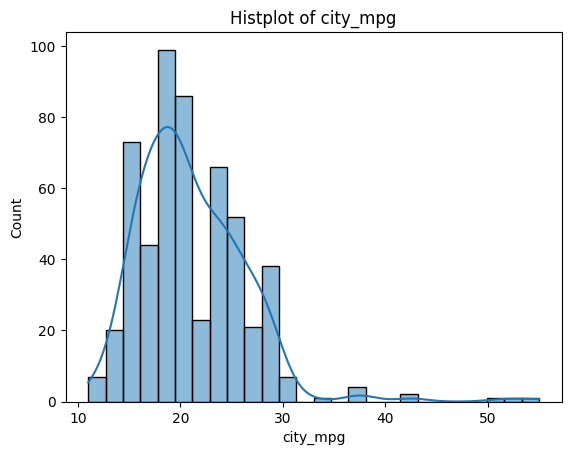

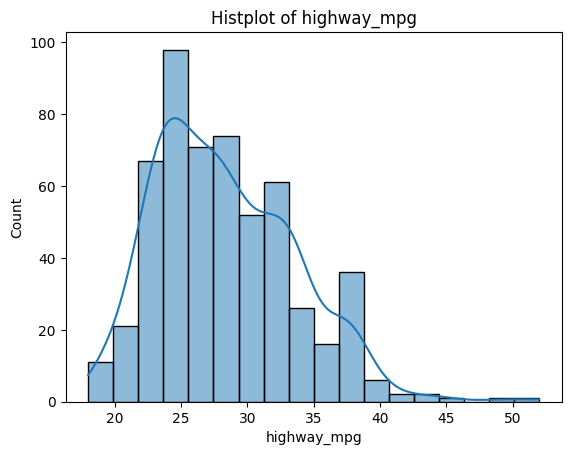

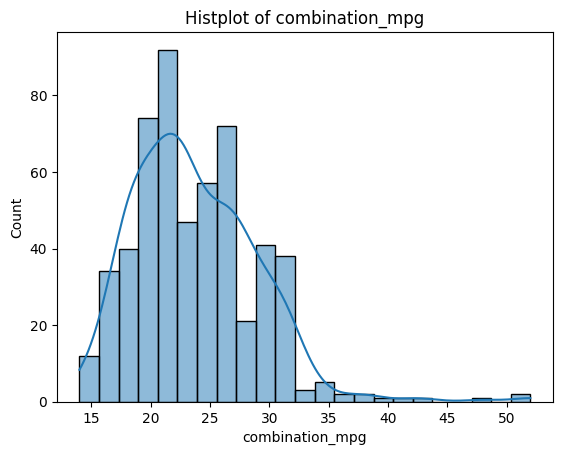

In [13]:
for mpg in mpg_cols:
    sns.histplot(car_data[mpg], kde=True)
    plt.title(f"Histplot of {mpg}")
    plt.show()

<Axes: ylabel='Count'>

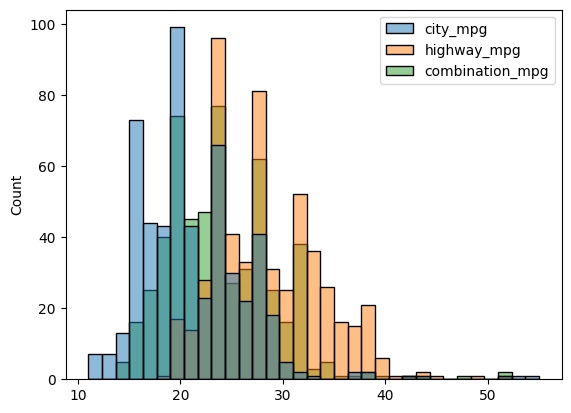

In [14]:
sns.histplot(car_data[mpg_cols])

In [15]:
car_data[mpg_cols].describe()

,city_mpg,highway_mpg,combination_mpg
count,546.000000,546.000000,546.000000
mean,21.064103,28.329670,23.725275
std,5.323784,5.281552,5.264175
min,11.000000,18.000000,14.000000
25%,17.000000,24.000000,20.000000
50%,20.000000,28.000000,23.000000
75%,24.000000,32.000000,27.000000
max,55.000000,52.000000,52.000000


Looks like the combination (`combination_mpg`) is defined by the mean of city and highway mpg, minus one and rounded (with floor).

In [16]:
test_combination = np.floor(((car_data['city_mpg'] + car_data['highway_mpg'])) - 1)
test_combination

0      60
1      62
2      55
3      59
4      57
       ..
545    55
546    49
547    49
548    40
549    40
Length: 546, dtype: int64

Looks right for most part of the database, but not for all of the values

In [17]:
(test_combination == car_data['combination_mpg']).value_counts()

False    546
Name: count, dtype: int64

In [18]:
car_data.loc[test_combination != car_data['combination_mpg'], mpg_cols]

,city_mpg,highway_mpg,combination_mpg
0,25,36,29
1,26,37,30
2,25,31,27
3,26,34,29
4,26,32,28
...,...,...,...
545,23,33,27
546,21,29,24
547,21,29,24
548,17,24,19


## Distribution of Numerical Features

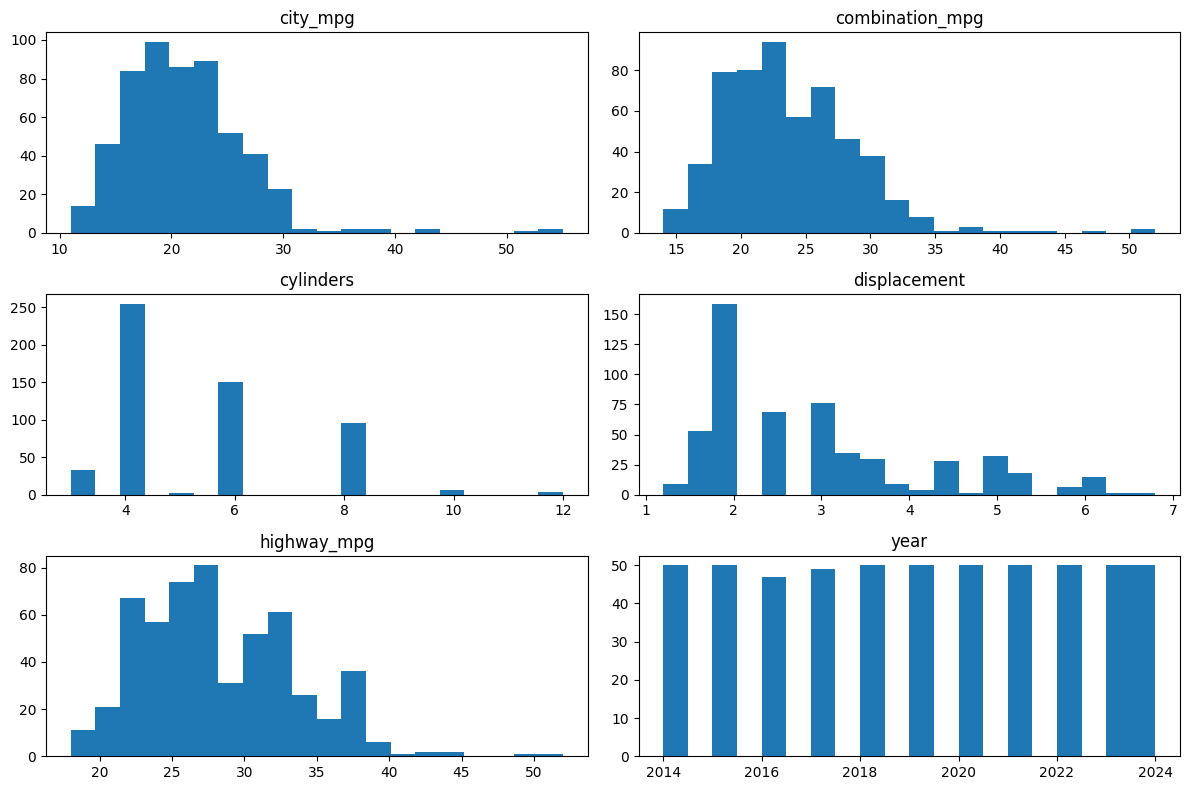

In [19]:
numeric_cols = car_data.select_dtypes(include=[np.number]).columns
car_data[numeric_cols].hist(figsize=(12, 8), bins=20, grid=False)
plt.tight_layout()

## Distribution of Categorical Features

In [20]:
car_data['model'].value_counts()

model
veloster                   12
cooper convertible          9
g70 rwd                     9
6                           8
cx-5 2wd                    8
                           ..
defender 90 mhev            1
defender 110 mhev           1
840i xdrive convertible     1
840i gran coupe             1
840i xdrive gran coupe      1
Name: count, Length: 275, dtype: int64

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

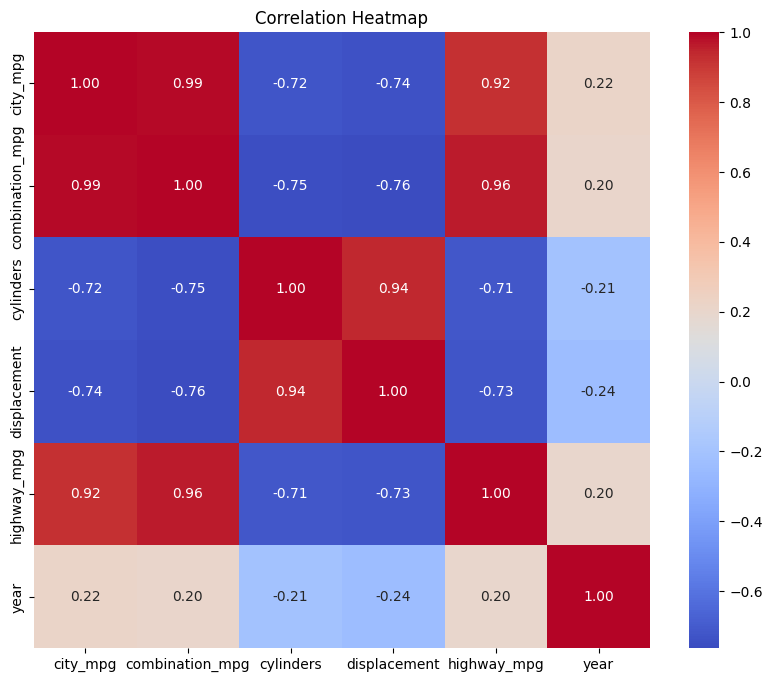

In [21]:
correlation_matrix = car_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')

In [22]:
car_data[numeric_cols].corrwith(car_data['combination_mpg'])

city_mpg           0.987286
combination_mpg    1.000000
cylinders         -0.749966
displacement      -0.762975
highway_mpg        0.963030
year               0.203235
dtype: float64

## Relationships Between Key Features

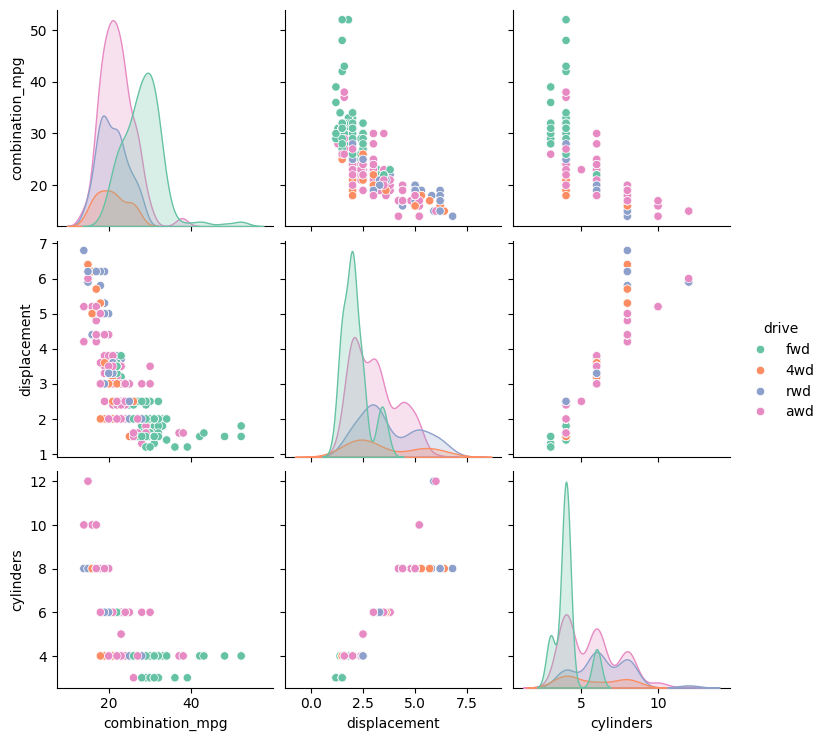

In [23]:
sns.pairplot(car_data, vars=['combination_mpg', 'displacement', 'cylinders'], hue='drive', palette='Set2', diag_kind='kde')

## Fuel Efficiency vs Engine Specifications

<Axes: xlabel='displacement', ylabel='combination_mpg'>

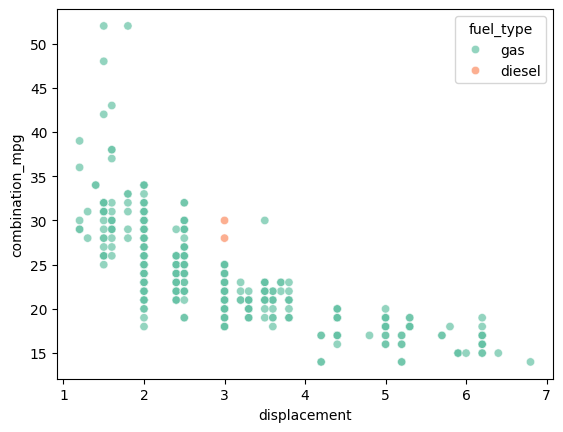

In [24]:
sns.scatterplot(x='displacement', y='combination_mpg', hue='fuel_type', data=car_data, alpha=0.7, palette='Set2')

<Axes: xlabel='cylinders', ylabel='combination_mpg'>

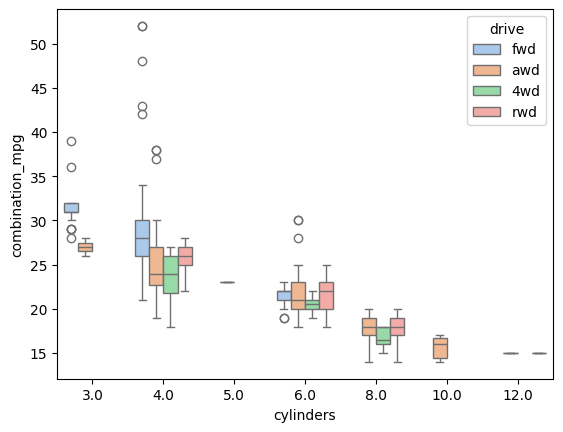

In [25]:
sns.boxplot(x='cylinders', y='combination_mpg', hue='drive', data=car_data, palette='pastel')

## Evolution of Fuel Efficiency Over Time

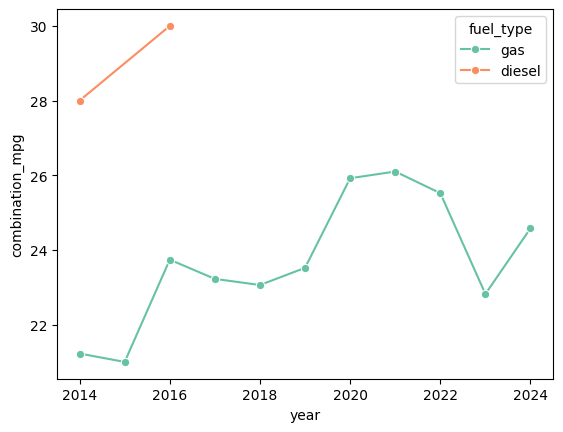

In [26]:
sns.lineplot(x='year', y='combination_mpg', hue='fuel_type', data=car_data, errorbar=None, marker='o', palette='Set2')
plt.show()

# Machine Learning: Predicting Combination MPG

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

## Splitting Features and Target

In [28]:
X = car_data.drop(columns=['combination_mpg'])
y = car_data['combination_mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing Pipeline

In [29]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Model Pipeline

In [30]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

## Model Training

In [31]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['city_mpg', 'cylinders',
                                                   'displacement',
                                                   'highway_mpg', 'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['class', 'drive',
                                                   'fuel_type', 'make', 'model',
                                                   'transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## Model Evaluation

In [32]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.18
Mean Absolute Error: 0.26
R2 Score: 0.99


## Model training and evaluation - multiple models

In [33]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

def run_multiple_models(X_train, y_train, X_test, y_test):
    models = {
        'RandomForest': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', RandomForestRegressor(random_state=42))]),
        'LinearRegression': Pipeline(steps=[('preprocessor', preprocessor),
                                            ('regressor', LinearRegression())]),
        'SVR': Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', SVR())])
    }

    results = {}
    for model_name, model in models.items():
        print(f"Training {model_name} model...")
        trained_model = train_model(model, X_train, y_train)
        mse, mae, r2 = evaluate_model(trained_model, X_test, y_test)
        results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    return results

def tune_model(model, X_train, y_train, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [34]:
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5]
}

param_grid_svr = {
    'regressor__C': [1, 10, 100],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__kernel': ['linear', 'rbf']
}

models = {
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', RandomForestRegressor(random_state=42))]),
    'SVR': Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVR())])
}

In [35]:
best_models = {}

for model_name, model in models.items():
    if model_name == 'RandomForest':
        best_model, best_params = tune_model(model, X_train, y_train, param_grid_rf)
    else:
        best_model, best_params = tune_model(model, X_train, y_train, param_grid_svr)
    
    best_models[model_name] = {'model': best_model, 'best_params': best_params}

print("Best models and parameters:", best_models)

Best models and parameters: {'RandomForest': {'model': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['city_mpg', 'cylinders',
                                                   'displacement',
                                                   'highway_mpg', 'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['class', 'drive',
                                                   'fuel_type', 'make', 'model',
                                                   'transmission'])])),
     

In [36]:
def evaluate_best_models(best_models, X_test, y_test):
    results = {}
    
    for model_name, model_info in best_models.items():
        model = model_info['model']
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
        
        print(f"{model_name} Model Evaluation:")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R² Score: {r2:.2f}\n")
    
    return results

test_results = evaluate_best_models(best_models, X_test, y_test)

RandomForest Model Evaluation:
Mean Squared Error: 0.17
Mean Absolute Error: 0.26
R² Score: 0.99

SVR Model Evaluation:
Mean Squared Error: 0.14
Mean Absolute Error: 0.31
R² Score: 0.99



Both models are performing quite well, with very similar results, with the RandomForest model showing a slight advantage in terms of MAE.